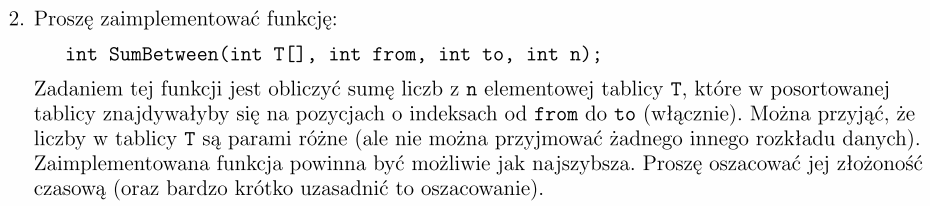

### Implementacja #1 (zwykły Quick Select)

In [1]:
def sumBetween(arr, from_, to):
    if not arr or from_ < 0 or to > len(arr): return None
    
    quick_select(arr, from_, 0, len(arr) - 1)
    if to > from_:
        quick_select(arr, to, from_ + 1, len(arr) - 1)
    
    sum_ = 0
    # Calculate a sum of elements within this span
    for i in range(from_, to + 1):
        sum_ += arr[i]
            
    # Return a result
    return sum_

    
def quick_select(arr, k, left_idx, right_idx):
    pivot_position = _partition(arr, left_idx, right_idx)
        
    if pivot_position > k:
        return quick_select(arr, k, left_idx, pivot_position - 1)
    elif pivot_position < k:
        return quick_select(arr, k, pivot_position + 1, right_idx)
    else:
        return arr[pivot_position]
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[right_idx]
    
    # Swap a pivot with the last element
    swap(arr, right_idx, right_idx)
    
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater than a pivot
    i = left_idx
    for j in range(left_idx, right_idx):
        if arr[j] < pivot:
            swap(arr, i, j)
            i += 1
    
    # Place a pivot element on its destination index
    swap(arr, i, right_idx)
    
    return i  # Return a pivot position after the last swap

    
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [2]:
import random

# Tworzymy tablicę liczb parami różnych
arr = list(set(random.randint(-100, 100) for _ in range(random.randint(0, 100))))
arr_cp = arr[:]
from_ = random.randrange(len(arr)) if arr else 0
to = random.randrange(from_, len(arr)) if from_ < len(arr) else from_
print('Input arr:', arr, sep='\n', end='\n\n')
sorted_arr = sorted(arr)
print('Sorted arr:', sorted_arr, sep='\n', end='\n\n')
res = sumBetween(arr, from_, to)
print('Array after summing:', arr, sep='\n', end='\n\n')
print('from:', from_, 'to', to)
print('Expected:', sum(sorted_arr[from_:to + 1]) if from_ < len(arr) and to >= 0 and arr else None)
print('Result:', res)

Input arr:
[4, 15, 16, 17, 20, 21, 27, -100, 30, -95, 35, 37, 38, 39, 40, -87, 43, -81, -76, -74, -72, -70, -69, -66, 70, -57, 72, 73, 76, -47, -46, 84, 89, -38, -37, 90, 93, 94, 97, 99, -28, -27, -19, -18, -17, -13, -10, -9, -6]

Sorted arr:
[-100, -95, -87, -81, -76, -74, -72, -70, -69, -66, -57, -47, -46, -38, -37, -28, -27, -19, -18, -17, -13, -10, -9, -6, 4, 15, 16, 17, 20, 21, 27, 30, 35, 37, 38, 39, 40, 43, 70, 72, 73, 76, 84, 89, 90, 93, 94, 97, 99]

Array after summing:
[-100, -95, -87, -81, -76, -74, -72, -70, -69, -66, -57, -47, -46, -38, -37, -28, -27, -19, -18, -17, -13, -10, -9, -6, 4, 15, 72, 73, 76, 37, 38, 84, 89, 39, 40, 90, 93, 94, 97, 99, 16, 43, 17, 20, 21, 27, 70, 30, 35]

from: 10 to 24
Expected: -368
Result: -368


### Implementacja #2 (Median of Medians pivot)

In [3]:
def sumBetween(arr, from_, to):
    if not arr or from_ < 0 or to > len(arr): return None
    
    linear_select(arr, from_, 0, len(arr) - 1)
    if to > from_:
        linear_select(arr, to, from_ + 1, len(arr) - 1)
    
    sum_ = 0
    # Calculate a sum of elements within this span
    for i in range(from_, to + 1):
        sum_ += arr[i]
            
    # Return a result
    return sum_


def linear_select(arr: list, k: 'index of element', left_idx, right_idx):
    if not 0 <= k < len(arr):
        raise IndexError(f'array index too {"small" if k < 0 else "large"}')
    if len(arr) == 1:
        return arr[0]

    # Loop till the subarray is not empty
    while left_idx <= right_idx:
        # Calculate a median of medians and store this value on the left_idx
        median_of_medians(arr, left_idx, right_idx)
        # Partition the current subarray using a median calculated above
        # as a pivot value
        pivot_idx = _partition(arr, left_idx, right_idx)

        # If a pivot was placed before the index desired, we have to look for
        # a desired value int the right part of the current subarray
        if pivot_idx < k:
            left_idx = pivot_idx + 1
        # If a pivot was placed after the index desired, we have to search
        # for a value in the left part of the current subarray
        elif pivot_idx > k:
            right_idx = pivot_idx - 1
        # Otherwise, (if k == pivot_idx) return a value which was searched
        else:
            return arr[k]


def median_of_medians(arr: list, left_idx: int, right_idx: int, k: int = 5) -> 'median of medians':
    # Store the position on which the next median will be stored
    # (we will store each median of current k-element subarrays one
    # after another at the beginning of the subarray which begins
    # on the left_index and ends on the right_idx (inclusive)
    next_swap_idx = left_idx

    # Loop till the current subarray has more than k elements
    while right_idx - left_idx >= k:
        # Calculate and store a median of each full k-element subarray
        for end_idx in range(left_idx + k-1, right_idx + 1, k):
            # Store a median on the next index just after the last median stored
            # (swap a median with a value placed after previously calculated medians)
            _swap(arr, next_swap_idx, _select_median(arr, end_idx - k + 1, end_idx))
            next_swap_idx += 1

        # Calculate and store a median of the remaining subarray
        # (which has less than k elements)
        if end_idx < right_idx - 1:
            _swap(arr, next_swap_idx, _select_median(arr, end_idx, right_idx))
            next_swap_idx += 1

        # Prepare variables for the next loop (we will calculate a median of
        # the subarray of medians calculated above, so the right_idx will now
        # be equal to the index of the last median previously determined)
        right_idx = next_swap_idx - 1
        next_swap_idx = left_idx

    # Finally, swap a median of the subarray of medians (which has no more than
    # k elements) with the first (leftmost) value of the subarray
    _swap(arr, left_idx, _select_median(arr, left_idx, right_idx))
    # Return a value of a median
    return arr[left_idx]


def _select_median(arr: list, left_idx: int, right_idx: int) -> int:
    # Using the Selection Sort concept, sort only elements of the
    # subarray which are placed up to the middle index (including
    # the middle element)
    mid_idx = (right_idx + left_idx) // 2
    for i in range(left_idx, mid_idx + 1):
        min_idx = i
        for j in range(i + 1, right_idx + 1):
            if arr[j] < arr[min_idx]:
                min_idx = j
        _swap(arr, min_idx, i)
    # Return the middle index which is a position of the median
    # after sorting a part of the subarray
    return mid_idx


def _swap(arr: list, i: int, j: int):
    arr[i], arr[j] = arr[j], arr[i]


def _partition(arr: list, left_idx: int, right_idx: int) -> int:
    # After running the median of medians function a pivot (this median of medians)
    # will be placed on the left_idx of the subarray
    pivot = arr[left_idx]

    # Partition an array into 2 subarrays: the first one of elements lower than
    # a pivot and the second one of elements greater than or equal to a pivot
    i = left_idx + 1
    for j in range(left_idx, right_idx + 1):
        if arr[j] < pivot:
            _swap(arr, i, j)
            i += 1

    # Place a pivot element on its destination index
    _swap(arr, i - 1, left_idx)

    return i - 1  # Return a pivot position after the last swap

###### Kilka testów

In [4]:
import random

# Tworzymy tablicę liczb parami różnych
arr = list(set(random.randint(-100, 100) for _ in range(random.randint(0, 100))))
arr_cp = arr[:]
from_ = random.randrange(len(arr)) if arr else 0
to = random.randrange(from_, len(arr)) if from_ < len(arr) else from_
print('Input arr:', arr, sep='\n', end='\n\n')
sorted_arr = sorted(arr)
print('Sorted arr:', sorted_arr, sep='\n', end='\n\n')
res = sumBetween(arr, from_, to)
print('Array after summing:', arr, sep='\n', end='\n\n')
print('from:', from_, 'to', to)
print('Expected:', sum(sorted_arr[from_:to + 1]) if from_ < len(arr) and to >= 0 and arr else None)
print('Result:', res)

Input arr:
[96, 51, 38, 39]

Sorted arr:
[38, 39, 51, 96]

Array after summing:
[38, 39, 51, 96]

from: 3 to 3
Expected: 96
Result: 96
